In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib
import time
import numpy as np
%matplotlib inline

import pandas as pd
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 100



In [2]:
#Model File Directory
WORK_DIR = '/var/spark/ml_files/'

#Label Keys
LABEL = "success"

MODEL_TYPE = "ML-BR"

# start_date = '2018-01-01'
start_date = '2019-01-01'

# end_date = '2018-12-31'
end_date = '2019-06-30'

# desc = '%s_%s_for_calendar_retry_attempt'.format(start_date, end_date)

In [3]:
# from cassandra
from cassandra.cluster import Cluster
cassandra_endpoint = '10.81.12.121' #'10.62.1.118'
# cassandra_endpoint = '10.224.12.32'
cluster = Cluster([cassandra_endpoint])
# session = cluster.connect('subs')


In [4]:
FEATURES_CANDIDATES = ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 
                 'day_of_month', 'site_id', 'failed_decline_type', 'merchant_number', 
                'payment_service_id', 'payment_method_id', 'bin', 'renew_att_num', 'failed_day_of_month', 
                'payment_currency', 'days_between', 'failed_response_code', 'payment_amount_usd', 'date_increment', 'transaction_hour']

USECOLS = FEATURES_CANDIDATES +  ['new_status','subscription_id', 'success', 'cid' ,'bank_name','added_expiry_years', 'failed_response_message','date_increment', 'received_date', 'billing_country', 'transaction_date_in_string', 'cc_expiration_date', 'failed_attempt_date']

In [112]:
retry_success_2018 = pd.read_csv(WORK_DIR + 'calendar_retry_01_to_12.csv', usecols=USECOLS)
retry_success_2018 = retry_success_2018[retry_success_2018['success'] == 1]
retry_success_2018 = retry_success_2018[~(retry_success_2018['new_status'] == 'Reversed')]
retry_success_2018.shape

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1199278, 34)

In [5]:
all_files = ['calendar_retry_2019_01_to_04_new.csv', 'calendar_retry_2019_05_06_new.csv']

retry_success_2019 =  pd.concat((pd.read_csv(WORK_DIR + file, usecols=USECOLS) for file in all_files) , ignore_index=True)
retry_success_2019 = retry_success_2019[~(retry_success_2019['new_status'] == 'Reversed')]
retry_success_2019.shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


(3855915, 33)

In [6]:
retry_success_2019_06 = pd.read_csv(WORK_DIR + 'calendar_retry_2019_06.csv', usecols=USECOLS)
retry_success_2019_06 = retry_success_2019_06[~(retry_success_2019_06['new_status'] == 'Reversed')]
retry_success_2019_06.shape

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(517648, 33)

In [7]:
retry_success_2019_07 = pd.read_csv(WORK_DIR + 'calendar_retry_2019_07_new.csv', usecols=USECOLS)

retry_success_2019_07.shape

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(629027, 33)

In [8]:
retry_success_2019_08_to_09 = pd.read_csv(WORK_DIR + 'calendar_retry_2019_08_to_09_new.csv', usecols=USECOLS)
retry_success_2019_08_to_09 = retry_success_2019_08_to_09[~(retry_success_2019_08_to_09['new_status'] == 'Reversed')]
retry_success_2019_08_to_09 = retry_success_2019_08_to_09[~retry_success_2019_08_to_09['payment_amount_usd'].isna()]
retry_success_08 = retry_success_2019_08_to_09[retry_success_2019_08_to_09['received_date'].str.startswith('2019-08')]
retry_success_09 = retry_success_2019_08_to_09[retry_success_2019_08_to_09['received_date'].str.startswith('2019-09')]
retry_success_09.head()

,received_date,site_id,subscription_id,added_expiry_years,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,funding_source,issuer_country,merchant_number,new_status,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,transaction_date_in_string,transaction_hour,success,failed_attempt_date,failed_day_of_month,failed_response_code,failed_response_message,failed_decline_type,days_between
3,2019-09-04,adbehbr,10030264201,NaN,BANCO SANTANDER (BRASIL) S.A.,BR,542820.0,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit - Credit Hybrid (meaning it has pin capability also),0623,NaN,NaN,4,Credit,BR,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,Declined,8.379192,BRL,MasterCard,pagador,2,2019-09-04 02:15:44,2,0,2019-08-28 03:15:56,28,530.0,7: Do Not Honor,do_not_honor,7
4,2019-09-04,adbehap,10031043801,NaN,Bank of Ayudhya Public Company Limited,TH,409344.0,Visa,Visa Signature,Consumer,Credit - True credit (No PIN/Signature capability),0222,NaN,NaN,4,Credit,TH,DR_IRELAND_ROW,Declined,11.605974,THB,Visa,adyen,2,2019-09-04 01:53:19,1,0,2019-08-28 02:54:13,28,530.0,27001: Transaction refused,txn_refused,7
9,2019-09-05,adbehap,10062414901,NaN,KASIKORNBANK PUBLIC COMPANY LIMITED,TH,540488.0,MasterCard,Gold MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capability),0420,NaN,NaN,5,Credit,TH,DR_IRELAND_ROW,Completed,11.628151,THB,MasterCard,adyen,5,2019-09-05 01:27:11,1,1,2019-08-29 01:08:18,29,530.0,27001: Transaction refused,txn_refused,7
14,2019-09-04,adbehbr,10148099001,3,BANCO BRADESCO S.A.,BR,536805.0,MasterCard,Platinum MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capability),0822,NaN,NaN,4,Credit,BR,75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E,Declined,25.137576,BRL,MasterCard,pagador,2,2019-09-04 02:15:45,2,0,2019-08-28 02:46:02,28,530.0,7: Do Not Honor,do_not_honor,7
32,2019-09-05,avast,10308029501,3,NaN,JP,354008.0,Discover,Consumer Credit - Premium,Consumer,Credit - True credit (No PIN/Signature capability),0722,NaN,NaN,5,Credit,JP,DR_IRELAND_ROW,Declined,42.177766,JPY,JCB,adyen,2,2019-09-05 00:47:23,0,0,2019-08-26 00:50:26,26,530.0,27001: Transaction refused,txn_refused,10


In [9]:
retry_success_2019 = pd.concat([retry_success_2019, retry_success_2019_07], ignore_index=True)

retry_success_2019.shape

(4484942, 33)

In [13]:
FEATURES_FLOAT = ['bin', 'renew_att_num', 'failed_response_code']
# FEATURES_FLOAT = ['date_increment']

def handle_feat_float(df):
        for feat in FEATURES_FLOAT:
            if feat in FEATURES_FLOAT:
                df[feat] = df[feat].apply(str).str.replace('.0', '', regex=False)
        return df

# handle_feat_float(retry_success)    
handle_feat_float(retry_success_2019)    

# retry_success.head()

,received_date,site_id,subscription_id,added_expiry_years,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,funding_source,issuer_country,merchant_number,new_status,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,transaction_date_in_string,transaction_hour,success,failed_attempt_date,failed_day_of_month,failed_response_code,failed_response_message,failed_decline_type,days_between
0,2019-04-13,kasperus,10000899501,NaN,Navy Federal Credit Union,US,400022,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),0320,NaN,NaN,13,Debit,US,311009012882,Declined,119.99,USD,Visa,firstdata,2,2019-04-13 07:45:58,7,0,2019-04-08 14:15:06,8,201,14: INV ACCT NUM,Base,5
1,2019-04-18,kasperus,10000899501,NaN,Navy Federal Credit Union,US,400022,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),0320,NaN,NaN,18,Debit,US,311009012882,Declined,119.99,USD,Visa,firstdata,3,2019-04-18 05:16:43,5,0,2019-04-13 07:45:58,13,201,14: INV ACCT NUM,Base,5
2,2019-04-25,kasperus,10000899501,NaN,Navy Federal Credit Union,US,400022,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),0320,NaN,NaN,25,Debit,US,311009012882,Declined,119.99,USD,Visa,firstdata,4,2019-04-25 09:15:53,9,0,2019-04-18 05:16:43,18,201,14: INV ACCT NUM,Base,7
3,2019-04-13,kasper,10001135201,0,Swisscard AECS GmbH,CH,402730,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1117,NaN,0.0,13,Credit,CH,1411163460-CHF-pacific,Declined,72.00,CHF,Visa,netgiro-bms,2,2019-04-13 01:25:03,1,0,2019-04-08 00:34:31,8,530,27001: Transaction refused,txn_refused,5
4,2019-04-18,kasper,10001135201,2,Swisscard AECS GmbH,CH,402730,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1119,NaN,3.0,18,Credit,CH,1411163460-CHF-pacific,Declined,71.40,CHF,Visa,netgiro-bms,3,2019-04-18 00:33:22,0,0,2019-04-13 01:25:05,13,530,27001: Transaction refused,txn_refused,5
5,2019-04-13,avast,10001255101,NaN,NaN,US,371558,American Express,"No Data Found', value: 'N/A",No Data found,Credit - True credit (No PIN/Signature capability),0120,NaN,NaN,13,No Data found,NaN,941000108071_00000001,Declined,49.99,USD,AmericanExpress,mes,2,2019-04-13 07:42:45,7,0,2019-04-03 15:45:20,3,530,51: DECLINED,declined,10
6,2019-04-18,avast,10001255101,NaN,NaN,US,371558,American Express,"No Data Found', value: 'N/A",No Data found,Credit - True credit (No PIN/Signature capability),0120,NaN,NaN,18,No Data found,NaN,941000108071_00000001,Declined,49.99,USD,AmericanExpress,mes,3,2019-04-18 16:45:56,16,0,2019-04-13 07:42:45,13,530,51: DECLINED,declined,5
7,2019-04-19,tmapac,10001514301,NaN,COMMONWEALTH BANK OF AUSTRALIA,AU,521729,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - Pin Capable,1019,NaN,NaN,19,Debit,AU,DR_IRELAND_ROW,Declined,31.60,MYR,MasterCard,adyen,2,2019-04-19 12:00:11,12,0,2019-04-14 12:42:06,14,401,Blocked Card: Blocked Card,blocked_first_used,5
8,2019-04-26,tmapac,10001514301,NaN,COMMONWEALTH BANK OF AUSTRALIA,AU,521729,MasterCard,Standard Debit MasterCard,Consumer,Debit - NON USA Consumer Debit - Pin Capable,1019,NaN,NaN,26,Debit,AU,DR_IRELAND_ROW,Declined,31.60,MYR,MasterCard,adyen,3,2019-04-26 00:35:23,0,0,2019-04-19 12:00:11,19,401,Blocked Card: Blocked Card,blocked_first_used,7
9,2019-04-13,avast,10001569501,NaN,JACK HENRY & ASSOCIATES,US,551765,MasterCard,Debit MasterCard (Enhanced),Consumer,Debit - Debit Hybrid (PIN and Signature),1120,NaN,NaN,13,Debit,US,311009012882,Declined,49.99,USD,MasterCard,firstdata,2,2019-04-13 08:15:57,8,0,2019-04-03 13:15:33,3,530,349: Do Not Honor,do_not_honor,10


In [11]:
original_size = len(retry_success_2019)
balanced_size = len(retry_success_2019)
fail_size = retry_success_2019[LABEL].value_counts(normalize=True)[0.0]
success_size =  retry_success_2019[LABEL].value_counts(normalize=True)[1.0]

In [12]:
#import for training
import numpy as np
from sklearn import cross_validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn import tree
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
# from spark_sklearn import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

# from src.web.utils import PreProcessing
from src.web.preprocessing import PreProcessing
from src.web.encoder import EnhancedLeaveOneOutEncoder
from src.web.train_util import *

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
INPUT_FEATURES = {
            "billing_country": {
                "type": "string"
            },
            "bin": {
                "type": "string"
            },
            "card_brand": {
                "type": "string"
            },
            "card_category": {
                "type": "string"
            },
            "card_class": {
                "type": "string"
            },
            "card_usage": {
                "type": "string"
            },
            "cc_expiration_date": {
                "type": "string"
            },
            "day_of_month": {
                "type": "integer"
            },
            "failed_attempt_date": {
                "type": "string"
            },
            "failed_response_code": {
                "type": "string"
            },
            "failed_response_message": {
                "type": "string"
            },
            "funding_source": {
                "type": "string"
            },
            "issuer_country": {
                "type": "string"
            },
            "merchant_number": {
                "type": "string"
            },
            "payment_amount_usd": {
                "type": "number"
            },
            "payment_currency": {
                "type": "string"
            },
            "payment_method_id": {
                "type": "string"
            },
            "payment_service_id": {
                "type": "string"
            },
            "renew_att_num": {
                "type": "integer"
            },
            "site_id": {
                "type": "string"
            },
            "transaction_date_in_string": {
                "type": "string"
            },
            "date_increment": {
                "type": "string"
            }
        }


In [164]:
bin_profile_per_date = pd.read_csv(WORK_DIR + 'bin_profile_per_date_201801_to_201907.csv')
bin_profile_per_date['bin'] = bin_profile_per_date['bin'].apply(str).str.replace('.0', '', regex=False)
max_per_date_dict = bin_profile_per_date.set_index(['bin', 'day_of_month'])['Max_99'].T.to_dict()

In [14]:
date_mid_bin = pd.read_csv(WORK_DIR + 'date_mid_bin_2019_01_to_2019_07.csv')
date_mid_bin['bin'] = date_mid_bin['bin'].apply(str).str.replace('.0', '', regex=False)
date_mid_bin_dict = date_mid_bin[date_mid_bin['nunique'] > 30].set_index(['bin', 'merchant_number','day_of_month'])['success_rate'].T.to_dict()

date_processor_bin = pd.read_csv(WORK_DIR + 'date_procesoor_bin_2019_01_to_2019_07.csv')
date_processor_bin['bin'] = date_processor_bin['bin'].apply(str).str.replace('.0', '', regex=False)
date_processor_bin_dict = date_processor_bin[date_processor_bin['nunique'] > 30].set_index(['bin', 'payment_service_id','day_of_month'])['success_rate'].T.to_dict()


date_bin = pd.read_csv(WORK_DIR + 'date_bin_2019_01_to_2019_07.csv')
date_bin['bin'] = date_bin['bin'].apply(str).str.replace('.0', '', regex=False)
date_bin_dict = date_bin[date_bin['nunique'] > 30].set_index(['bin', 'day_of_month'])['success_rate'].T.to_dict()

# bin_profile_per_date = pd.read_csv(WORK_DIR + 'bin_profile_per_date_201801_to_201907.csv')
# bin_profile_per_date['bin'] = bin_profile_per_date['bin'].apply(str).str.replace('.0', '', regex=False)
# max_per_date_dict = bin_profile_per_date.set_index(['bin', 'day_of_month'])['Max_99'].T.to_dict()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
days_between_decline_type = pd.read_csv(WORK_DIR + 'days_between_decline_type_2019_01_to_2019_07.csv')
days_between_decline_type_dict = days_between_decline_type[days_between_decline_type['count'] > 15].set_index(['failed_decline_type', 'days_between'])['success_rate'].T.to_dict()

days_between_bin_decline_type = pd.read_csv(WORK_DIR + 'days_between_bin_decline_type_2019_01_to_2019_07.csv')
days_between_bin_decline_type['bin'] = days_between_bin_decline_type['bin'].apply(str).str.replace('.0', '', regex=False)
days_between_bin_decline_type_dict = days_between_bin_decline_type[days_between_bin_decline_type['count'] > 15].set_index(['failed_decline_type', 'bin','days_between'])['success_rate'].T.to_dict()

days_between_country_decline_type = pd.read_csv(WORK_DIR + 'days_between_country_decline_type_2019_01_to_2019_07.csv')
days_between_country_decline_type_dict = days_between_country_decline_type[days_between_country_decline_type['count'] > 25].set_index(['failed_decline_type', 'issuer_country','days_between'])['success_rate'].T.to_dict()

days_between_date_decline_type = pd.read_csv(WORK_DIR + 'days_between_date_decline_type_2019_01_to_2019_07.csv')
days_between_date_decline_type_dict = days_between_date_decline_type[days_between_date_decline_type['count'] > 25].set_index(['failed_decline_type', 'day_of_month','days_between'])['success_rate'].T.to_dict()

days_between_date_bin_decline_type = pd.read_csv(WORK_DIR + 'days_between_date_bin_decline_type_2019_01_to_2019_07.csv')
days_between_date_bin_decline_type['bin'] = days_between_date_bin_decline_type['bin'].apply(str).str.replace('.0', '', regex=False)
days_between_date_bin_decline_type_dict = days_between_date_bin_decline_type[days_between_date_bin_decline_type['count'] > 25].set_index(['failed_decline_type', 'bin', 'day_of_month','days_between'])['success_rate'].T.to_dict()

days_between_bin_decline_code = pd.read_csv(WORK_DIR + 'days_between_bin_decline_code_2019_01_to_2019_07.csv')
days_between_bin_decline_code['bin'] = days_between_bin_decline_code['bin'].apply(str).str.replace('.0', '', regex=False)
days_between_bin_decline_code['failed_response_code'] = days_between_bin_decline_code['failed_response_code'].apply(str).str.replace('.0', '', regex=False)
days_between_bin_decline_code_dict = days_between_bin_decline_code[days_between_bin_decline_code['count'] > 25].set_index(['failed_response_code', 'bin','days_between'])['success_rate'].T.to_dict()

days_between_bin_failed_message = pd.read_csv(WORK_DIR + 'days_between_bin_failed_message_2019_01_to_2019_07.csv')
days_between_bin_failed_message['bin'] = days_between_bin_failed_message['bin'].apply(str).str.replace('.0', '', regex=False)
days_between_bin_failed_message_dict = days_between_bin_failed_message[days_between_bin_failed_message['count'] > 25].set_index(['failed_response_message', 'bin','days_between'])['success_rate'].T.to_dict()

days_between_site_decline_type = pd.read_csv(WORK_DIR + 'days_between_site_decline_type_2019_01_to_2019_07.csv')
days_between_site_decline_type_dict = days_between_site_decline_type[days_between_site_decline_type['count'] > 25].set_index(['failed_decline_type', 'site_id','days_between'])['success_rate'].T.to_dict()


days_between_site_decline_code = pd.read_csv(WORK_DIR + 'days_between_site_decline_code_2019_01_to_2019_07.csv')
days_between_site_decline_code['failed_response_code'] = days_between_site_decline_code['failed_response_code'].apply(str).str.replace('.0', '', regex=False)
days_between_site_decline_code_dict = days_between_site_decline_code[days_between_site_decline_code['count'] > 25].set_index(['failed_response_code', 'site_id','days_between'])['success_rate'].T.to_dict()

days_between_att_num_decline_type = pd.read_csv(WORK_DIR + 'days_between_att_num_decline_type_2019_01_to_2019_07.csv')
days_between_att_num_decline_type['renew_att_num'] = days_between_att_num_decline_type['renew_att_num'].apply(str).str.replace('.0', '', regex=False)
days_between_att_num_decline_type_dict = days_between_att_num_decline_type[days_between_att_num_decline_type['count'] > 25].set_index(['failed_decline_type', 'renew_att_num','days_between'])['success_rate'].T.to_dict()

days_between_country_site = pd.read_csv(WORK_DIR + 'days_between_country_site_2019_01_to_2019_07.csv')
days_between_country_site_dict = days_between_country_site[days_between_country_site['nunique'] > 25].set_index(['site_id', 'issuer_country','days_between'])['success_rate'].T.to_dict()


In [16]:
date_country_site = pd.read_csv(WORK_DIR + 'date_country_site_2019_01_to_2019_07.csv')
date_country_site_dict = date_country_site[date_country_site['nunique'] > 25].set_index(['site_id', 'issuer_country','day_of_month'])['success_rate'].T.to_dict()


In [26]:
# FEATURES_CAT = ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 
#                  'day_of_month', 'site_id', 'billing_country', 'failed_decline_type', 'merchant_number', 
#                 'payment_service_id', 'payment_method_id', 'bin', 'renew_att_num', 'failed_day_of_month', 
#                 'payment_currency', 'days_between', 'failed_response_code', 'bank_code', 'expiration_date_changed', 'processor_mid_changed', 'failed_payment_service_id', 'failed_merchant_number', 'failed_cid']


FEATURES_CAT = [  'site_id', 'renew_att_num', 'failed_response_code', 'merchant_number'] 

FEATURES_FLOAT = ['bin', 'renew_att_num', 'failed_response_code', 'date_increment']
FEATURES_NUM = []
FEATURES_NUM_CALCULATED = [] #['max_99_diff', 'max_diff']


FEATURES_NUM_BIN_PROFILE = [] 
FEATURES_NUM_ENCODED = [ 'date_processor_bin',   'days_between_bin_decline_type', 
                         'days_between_country_decline_type',  
                          'days_between_att_num_decline_type',
                        'days_between_site_decline_code', 'days_between_bin_decline_code', 'days_between_bin_failed_message',
                        'days_between_site_decline_type', 'date_bin'] + FEATURES_NUM_BIN_PROFILE


# FEATURES_GROUPED = [ ['days_between', 'renew_att_num', 'failed_decline_type'], 
#                     ['days_between', 'site_id', 'failed_decline_type'],
#                     ['days_between', 'issuer_country', 'failed_decline_type'],
#                     ['days_between', 'bin', 'failed_decline_type'],
#                     ['days_between', 'bin', 'failed_response_code'],
#                     ['day_of_month', 'bin', 'failed_decline_type'],
#                     ['days_between', 'renew_att_num', 'failed_response_code']
#                     ]
FEATURES_GROUPED = []

#'days_between_site_decline_code', 'days_between_bin_decline_code',

FEATURES_ENCODED = ['days_between', 'is_expired'] + FEATURES_NUM_ENCODED#,  'is_expired'

# FEATURES_NUM_ENCODED = ['payment_mid_bin']

FEATURES = FEATURES_CAT + FEATURES_ENCODED


from sklearn.model_selection import GridSearchCV
# from spark_sklearn import GridSearchCV

from src.web.preprocessing import PreProcessing
from src.web.preprocessing import make_pipeline
from sklearn.preprocessing import Imputer

# FIELDS = FEATURES_CAT + FEATURES_NUM + ['transaction_date_in_string', 'cc_expiration_date', 'failed_attempt_date', 'failed_cc_expiration_date'] + FEATURES_NUM_ENCODED + FEATURES_NUM_CALCULATED
ADDITIONAL_FIELDS = ['failed_response_message', 'failed_decline_type', 'bin',  'day_of_month', 'issuer_country', 'failed_day_of_month',   'payment_service_id',   'transaction_date_in_string', 'cc_expiration_date', 'failed_attempt_date']
FIELDS = FEATURES_CAT + FEATURES_NUM + ADDITIONAL_FIELDS #+ FEATURES_NUM_BIN_PROFILE

df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

# features_dict = {'FEATURES_CAT': FEATURES_CAT, 'FEATURES_NUM':FEATURES_NUM, 'FEATURES_ENCODED':FEATURES_ENCODED, 'FEATURES_NUM_ENCODED':FEATURES_NUM_ENCODED, 'FEATURES_NUM_CALCULATED':FEATURES_NUM_CALCULATED, 'FEATURES_FLOAT': FEATURES_FLOAT}
# features_dict_key = 'preprocessing__features_dict'

features_dict = {'LABEL': LABEL, 'FIELDS': FIELDS ,'FEATURES_CAT': FEATURES_CAT, 'FEATURES_NUM':FEATURES_NUM, 'FEATURES_ENCODED':FEATURES_ENCODED, 'FEATURES_NUM_ENCODED':FEATURES_NUM_ENCODED, 'FEATURES_NUM_CALCULATED':FEATURES_NUM_CALCULATED, 'FEATURES_FLOAT': FEATURES_FLOAT}
features_dict_key = 'preprocessing__features_dict'
features_dict['df_bin_profile'] = None #bin_profile
features_dict['df_decline_type'] = df_decline_type
features_dict['payment_mid_bin_dict'] = {}#payment_mid_bin_dict
features_dict['FEATURES_NUM_BIN_PROFILE'] = FEATURES_NUM_BIN_PROFILE
features_dict['FEATURES_GROUPED'] = FEATURES_GROUPED

# features_dict['group_dict'] = {"date_bin_dict": date_bin_dict, \
#                                "date_processor_bin_dict": date_processor_bin_dict }

features_dict['group_dict'] = {"date_bin_dict": date_bin_dict, \
                               "date_processor_bin_dict": date_processor_bin_dict, \
                               "days_between_site_decline_type_dict": days_between_site_decline_type_dict, \
                               "days_between_site_decline_code_dict": days_between_site_decline_code_dict, \
                               "days_between_att_num_decline_type_dict": days_between_att_num_decline_type_dict, \
                               "days_between_country_site_dict": days_between_country_site_dict, \
                               "days_between_bin_decline_type_dict": days_between_bin_decline_type_dict, "days_between_country_decline_type_dict":days_between_country_decline_type_dict, \
                               "days_between_bin_failed_message_dict":days_between_bin_failed_message_dict, "days_between_date_bin_decline_type_dict":days_between_date_bin_decline_type_dict, \
                               "days_between_bin_decline_code_dict": days_between_bin_decline_code_dict }

#                               "max_per_date_dict": max_per_date_dict , \
# features_dict['group_dict'] = {}

df_bin_profile is NONE
self.features_encoded: ['days_between', 'is_expired']
# Finish handle_feat_encoded.
self.features_all:  None
In fit, self.features_cat_and_encoded: ['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired']
['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired']
fit df[self.features_cat_and_encoded] size: (517648, 6)
# fit_time: 1.0299334526062012
In fit, self.encoder: 
EnhancedLeaveOneOutEncoder(cols=['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)


/var/spark/jupyter-notebooks/src/web/preprocessing.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[IS_EXPIRED] = df[~df['cc_expiration_date'].isna()].apply(is_expired, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = df[BIN].astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:646: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["date_bin"] = df.apply(self.group_util.date_bin, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

# transform_time: 1.1224231719970703
    site_id  renew_att_num  failed_response_code  merchant_number  \
0  0.191463       0.103288              0.094544         0.151448   
1  0.170675       0.121103              0.094544         0.151448   
2  0.062176       0.072902              0.094544         0.068116   
3  0.073059       0.072902              0.083432         0.077216   
4  0.255086       0.072902              0.083432         0.111513   

   days_between  is_expired  date_processor_bin  \
0      0.147312    0.105429           39.602850   
1      0.147312    0.105429           50.877193   
2      0.060846    0.105429           33.489461   
3      0.060846    0.105429           16.666667   
4      0.147312    0.105429           39.602850   

   days_between_bin_decline_type  days_between_country_decline_type  \
0                      43.478261                          19.390491   
1                      17.209302                          21.319395   
2                       2.37

/var/spark/jupyter-notebooks/src/web/preprocessing.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[IS_EXPIRED] = df[~df['cc_expiration_date'].isna()].apply(is_expired, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:557: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = pd.to_numeric(df[BIN], errors='coerce')
/var/spark/jupyter-notebooks/src/web/preprocessing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = df[BIN].astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:646: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

self.features_all:  None
In fit, self.features_cat_and_encoded: ['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired']
['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired']
fit df[self.features_cat_and_encoded] size: (517648, 6)
# fit_time: 0.8452272415161133
In fit, self.encoder: 
EnhancedLeaveOneOutEncoder(cols=['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)


/var/spark/jupyter-notebooks/src/web/preprocessing.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[IS_EXPIRED] = df[~df['cc_expiration_date'].isna()].apply(is_expired, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:557: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = pd.to_numeric(df[BIN], errors='coerce')
/var/spark/jupyter-notebooks/src/web/preprocessing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = df[BIN].astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:646: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

# transform_time: 7.741956949234009
    site_id  renew_att_num  failed_response_code  merchant_number  \
0  0.191463       0.121103              0.094544         0.180459   
1  0.062176       0.121103              0.094544         0.119590   
2  0.062176       0.072902              0.094544         0.119590   
3  0.073059       0.121103              0.136578         0.079335   
4  0.073059       0.121103              0.062917         0.077237   

   days_between  is_expired  date_processor_bin  \
0      0.147312    0.105432           88.200590   
1      0.086580    0.105432           52.023121   
2      0.060846    0.105432           40.963855   
3      0.086580    0.105432           29.508197   
4      0.086580    0.105432           58.426966   

   days_between_bin_decline_type  days_between_country_decline_type  \
0                      45.000000                          35.107376   
1                       5.348837                           7.373915   
2                       2.871

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


best_parameters  {'objective': 'binary:logistic', 'learning_rate': 0.08, 'max_depth': 7, 'min_child_weight': 35, 'silent': 0, 'subsample': 0.4, 'colsample_bytree': 0.4, 'n_estimators': 1000, 'missing': -999, 'seed': 1337, 'scale_pos_weight': 8.5, 'gamma': 1}
x_train (517648, 25)
x_test (119647, 14)
x_train  .....     site_id renew_att_num failed_response_code  \
0  adbehap             2                  530   
1  avastbr             2                  530   
2  avastbr             3                  530   
3    avast             2                  302   
4    avast             2                  501   

                        merchant_number    failed_response_message  \
0                1411163460-HKD-pacific          05 : Do not honor   
1  75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E            7: Do Not Honor   
2  75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E            7: Do Not Honor   
3                1411163460-NOK-pacific  27083: Insufficient Funds   
4                               7319737

/var/spark/jupyter-notebooks/src/web/preprocessing.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[IS_EXPIRED] = df[~df['cc_expiration_date'].isna()].apply(is_expired, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = df[BIN].astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:646: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["date_bin"] = df.apply(self.group_util.date_bin, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

# transform_time: 1.6340858936309814
    site_id  renew_att_num  failed_response_code  merchant_number  \
0  0.196275       0.121103              0.094544         0.119590   
1  0.191463       0.121103              0.094544         0.151448   
2  0.191463       0.164559              0.094544         0.151448   
3  0.196275       0.121103              0.094544         0.119590   
4  0.073059       0.121103              0.094544         0.151448   

   days_between  is_expired  date_processor_bin  \
0      0.147312    0.105432           73.619632   
1      0.147312    0.105432           77.272727   
2      0.147312    0.105432           39.602850   
3      0.147312    0.105432           64.779874   
4      0.086580    0.105432           39.602850   

   days_between_bin_decline_type  days_between_country_decline_type  \
0                      25.000000                          25.283421   
1                       6.578947                          19.390491   
2                      43.47

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# training time: 855.3741161823273
# Finish handle_feat_encoded.
# transform_time: 0.007775306701660156
feature_importance column  Index(['days_between', 'date_bin', 'days_between_country_decline_type',
       'renew_att_num', 'site_id', 'is_expired', 'failed_response_code',
       'days_between_bin_failed_message', 'days_between_att_num_decline_type',
       'days_between_bin_decline_code', 'date_processor_bin',
       'days_between_bin_decline_type', 'days_between_site_decline_type',
       'merchant_number', 'days_between_site_decline_code'],
      dtype='object')
feature_importance val  [ 13.087138  14.085616  17.765945  20.294828  21.240171  21.28911
  22.93395   27.121166  28.543892  29.972073  31.367529  33.559574
  40.50652   62.333126 100.      ]
sorted_idx:  [ 4 14  8  1  0  5  2 12  9 11  6  7 13  3 10]
accuracy_dummy .....: 0.8668165520238702
test accuracy: 0.6935485219019282
test auc: 0.7433499057804543
             precision    recall  f1-score   support

          0     

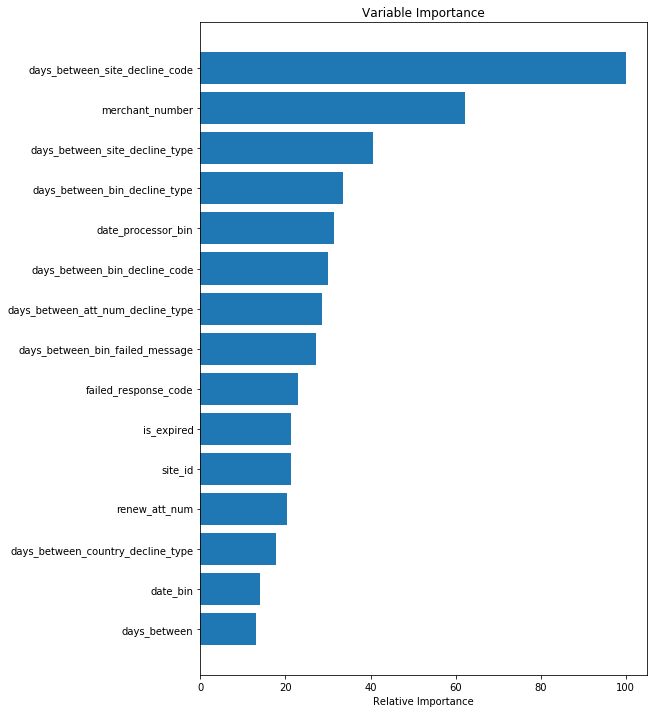

In [24]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
import src.web.preprocessing
from src.web.preprocessing import PreProcessing
from src.web.train_util import *
from importlib import import_module
import sys
classifier = XGBClassifier

input_data = retry_success_2019_06  #retry_success[~retry_success["subscription_id"].isin(duplicate_subs)]
scale_pos_weight = 8.5 #input_data[LABEL].value_counts(normalize=True)[0.0] / input_data[LABEL].value_counts(normalize=True)[1.0]

_preProcessor = PreProcessing(None).fit(input_data, input_data['success'], features_dict=features_dict)            
_x_eval = _preProcessor.transform(retry_success_08)
_y_eval = retry_success_08["success"]

alg_name = 'xgbclassifier'

tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.2], #so called `eta` value
              'max_depth': [10],
              'min_child_weight': [11],
              'silent': [0],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [1000], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step':[1],  
              'seed': [1337]}

best_parameters = {
              'objective': 'binary:logistic',
              'learning_rate': 0.08, #so called `eta` value
              'max_depth': 7,
              'min_child_weight': 35,
              'silent': 0,
              'subsample': 0.4,
              'colsample_bytree': 0.4,
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': 1000, #471, #800, 
              'missing':-999,
              'seed': 1337,
#               'reg_lambda': 2,
#               'reg_alpha': 1,
              'scale_pos_weight': scale_pos_weight, #8.51,
              'gamma': 1  }

model_file = ''
model_id = 'ML-BR-1'
version = get_latest_version(model_id, MODEL_TYPE) + 1
model_name = model_id + '.' + str(version)


fit_params = {
    f"{alg_name}__eval_metric":'auc',
    f"{alg_name}__eval_set":  [(_x_eval, _y_eval)],
    f"{alg_name}__early_stopping_rounds": 1000
}

features_dict['fit_params'] = fit_params

xgb_clf, result_d = build_and_train(input_data, classifier, tuned_parameters, alg_name, model_file, best_param=best_parameters, features_dict=features_dict, test_data=retry_success_09)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


df_bin_profile is NONE
self.features_encoded: ['days_between', 'is_expired']
# Finish handle_feat_encoded.
self.features_all:  None
In fit, self.features_cat_and_encoded: ['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired']
['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired']
fit df[self.features_cat_and_encoded] size: (100, 6)
# fit_time: 0.0269625186920166
In fit, self.encoder: 
EnhancedLeaveOneOutEncoder(cols=['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)


/var/spark/jupyter-notebooks/src/web/preprocessing.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[IS_EXPIRED] = df[~df['cc_expiration_date'].isna()].apply(is_expired, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:557: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = pd.to_numeric(df[BIN], errors='coerce')
/var/spark/jupyter-notebooks/src/web/preprocessing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = df[BIN].astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:646: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

# transform_time: 0.3855776786804199
    site_id  renew_att_num  failed_response_code  merchant_number  \
0  0.060000       0.000000               0.09434         0.000000   
1  0.060000       0.075472               0.09434         0.000000   
2  0.222222       0.047619               0.09434         0.200000   
3  0.048387       0.047619               0.00000         0.076923   
4  0.060000       0.047619               0.00000         0.060000   

   days_between  is_expired  date_processor_bin  \
0      0.000000    0.064516           45.250319   
1      0.000000    0.064516           50.877193   
2      0.052632    0.064516           33.489461   
3      0.052632    0.064516           16.666667   
4      0.000000    0.064516           45.250319   

   days_between_bin_decline_type  days_between_country_decline_type  \
0                      43.478261                          19.390491   
1                      17.209302                          21.319395   
2                       2.37

/var/spark/jupyter-notebooks/src/web/preprocessing.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[IS_EXPIRED] = df[~df['cc_expiration_date'].isna()].apply(is_expired, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["days_between_bin_decline_type"] = df.apply(self.group_util.days_between_bin_decline_type, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:688: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["days_between_bin_failed_message"] = df.apply(self.group_util.days_between_bin_failed_message, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

self.features_all:  None
In fit, self.features_cat_and_encoded: ['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired']
['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired']
fit df[self.features_cat_and_encoded] size: (100, 6)
# fit_time: 0.026709556579589844
In fit, self.encoder: 
EnhancedLeaveOneOutEncoder(cols=['site_id', 'renew_att_num', 'failed_response_code', 'merchant_number', 'days_between', 'is_expired'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)


/var/spark/jupyter-notebooks/src/web/preprocessing.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[IS_EXPIRED] = df[~df['cc_expiration_date'].isna()].apply(is_expired, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["date_processor_bin"] = df.apply(self.group_util.date_processor_bin, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["days_between_bin_decline_type"] = df.apply(self.group_util.days_between_bin_decline_type, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:688: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

# transform_time: 0.06128692626953125
   site_id  renew_att_num  failed_response_code  merchant_number  \
0      0.0       0.075472               0.00000         0.030303   
1      0.0       0.047619               0.00000         0.030303   
2      0.0       0.000000               0.00000         0.030303   
3      0.0       0.075472               0.09434         0.000000   
4      0.0       0.047619               0.09434         0.000000   

   days_between  is_expired  date_processor_bin  \
0      0.052632    0.064516           34.233129   
1      0.052632    0.064516           37.788018   
2      0.000000    0.064516           33.333333   
3      0.052632    0.000000           52.380952   
4      0.052632    0.064516           62.162162   

   days_between_bin_decline_type  days_between_country_decline_type  \
0                       0.905563                           2.231406   
1                       0.905563                           2.231406   
2                       0.581395 

/var/spark/jupyter-notebooks/src/web/preprocessing.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[IS_EXPIRED] = df[~df['cc_expiration_date'].isna()].apply(is_expired, axis=1)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finish handle_feat_encoded.


/var/spark/jupyter-notebooks/src/web/preprocessing.py:557: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = pd.to_numeric(df[BIN], errors='coerce')
/var/spark/jupyter-notebooks/src/web/preprocessing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[BIN] = df[BIN].astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:646: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

# transform_time: 0.5066180229187012
    site_id  renew_att_num  failed_response_code  merchant_number  \
0  0.000000       0.075472               0.09434              0.0   
1  0.060000       0.075472               0.09434              0.0   
2  0.060000       0.060000               0.09434              0.0   
3  0.000000       0.075472               0.09434              0.0   
4  0.048387       0.075472               0.09434              0.0   

   days_between  is_expired  date_processor_bin  \
0      0.000000    0.064516           73.619632   
1      0.000000    0.064516           77.272727   
2      0.000000    0.064516           45.250319   
3      0.000000    0.064516           64.779874   
4      0.088235    0.064516           45.250319   

   days_between_bin_decline_type  days_between_country_decline_type  \
0                      25.000000                          25.283421   
1                       6.578947                          19.390491   
2                      43.47

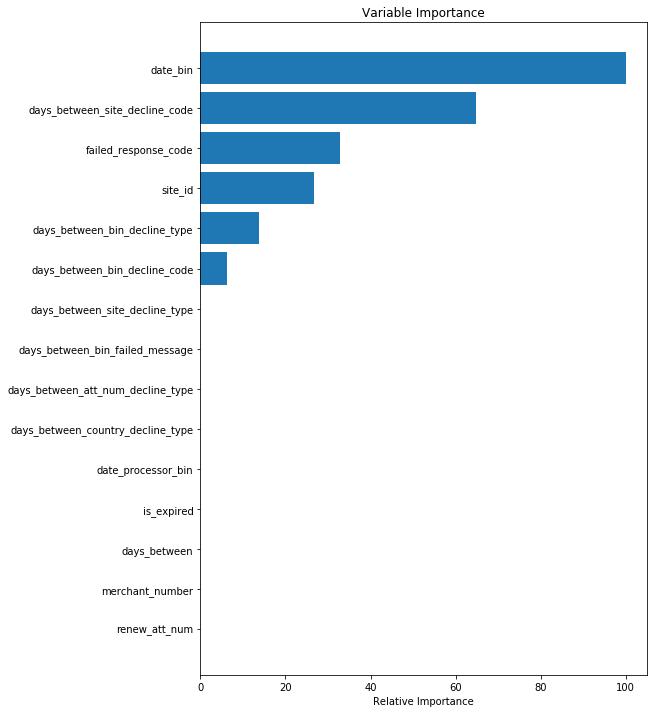

In [56]:
""" Train the model"""

from catboost import CatBoostClassifier, Pool
import src.web.preprocessing
from src.web.preprocessing import PreProcessing
from src.web.train_util import *
from importlib import import_module
import sys

classifier = CatBoostClassifier

input_data = retry_success_2019[:100]  #retry_success[~retry_success["subscription_id"].isin(duplicate_subs)]
# scale_pos_weight = 8.8 #input_data[LABEL].value_counts(normalize=True)[0.0] / input_data[LABEL].value_counts(normalize=True)[1.0]

_preProcessor = PreProcessing(None).fit(input_data, input_data['success'], features_dict=features_dict)            
_x_eval = _preProcessor.transform(retry_success_08)
_y_eval = retry_success_08["success"]


tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.2], #so called `eta` value
              'max_depth': [10],
              'min_child_weight': [11],
              'silent': [0],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [1000], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step':[1],  
              'seed': [1337]}

best_parameters = {
              'learning_rate': 0.08, 
              'depth': 7,
              'iterations': 1000,
              'random_seed': 8,
              'scale_pos_weight': 8.5,
              'custom_metric':['AUC:hints=skip_train~false']
              }

#               'eval_metric': 'Recall',
model_file = ''
model_id = 'ML-BR-1'
version = get_latest_version(model_id, MODEL_TYPE) + 1
model_name = model_id + '.' + str(version)

# features_dict['eval_metric'] = 'auc'
# features_dict['early_stopping_rounds'] = None #1600
# features_dict['eval_set'] = None #Pool(_x_eval, _y_eval) 

fit_params = {
    "catboostclassifier__verbose": True,
    "catboostclassifier__eval_set": Pool(_x_eval, _y_eval)
}

features_dict['fit_params'] = fit_params

clf, result_d = build_and_train(input_data, classifier, tuned_parameters, 'catboostclassifier', model_file, best_param=best_parameters, features_dict=features_dict, test_data=retry_success_09)
model_file, model_file_name = write_model(clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


In [ ]:
"""Upload model to Nexus repo and insert the model info into Cassandra table"""
import json

# start_date = '2018-01-12'
start_date = '2019-01-01'

# end_date = '2019-04-30'
end_date = '2019-07-31'

try:
    repo_path = upload_artifact(model_file_name)
    preprocess_repo_path = handle_preprocessing_file(model_id, version)
    size_desc = str(", original size: %s (fail: %s, success: %s), balanced_size: %s" % (original_size, fail_size, success_size, original_size))
    desc = '{}_{}_for_calendar retry model,  eval_metric= auc, with no date_increment, no payment amount and bin profile). {}'.format(start_date, end_date, size_desc)
    hyper_params = result_d.pop('hyper_params', None)
    extended_att = {"preprocess_repo_path": preprocess_repo_path, "input_features": INPUT_FEATURES}
    insert_model_info(model_id, version, repo_path, desc=desc, model_type=MODEL_TYPE,eval_metrics=json.dumps(result_d), 
                      hyper_parameter=json.dumps(hyper_params), extended_att=json.dumps(extended_att), features_dict=features_dict)
    
except Exception as ex:
    print(str(ex))
    if not hyper_params:
        result_d['hyper_params'] = hyper_params 